# Boiler Data Analysis - Multiple Boilers

This notebook demonstrates how to query the SQLite database containing the cleaned boiler data for all three boilers and provides examples of the types of insights that can be extracted from the data.

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Connect to the SQLite Database

In [2]:
# Connect to the SQLite database with all boilers data
conn = sqlite3.connect('boiler_data_all_sheets.db')

# List all tables in the database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:")
for table in tables:
    print(f"- {table[0]}")

Tables in the database:
- boiler_data
- boiler_bolr_1
- boiler_bol2
- boiler_bolr_3
- weekly_stats
- monthly_stats


## 2. Load Data for Each Boiler

In [3]:
# Load data for each boiler
boiler1_df = pd.read_sql("SELECT * FROM boiler_bolr_1", conn)
boiler2_df = pd.read_sql("SELECT * FROM boiler_bol2", conn)
boiler3_df = pd.read_sql("SELECT * FROM boiler_bolr_3", conn)

# Display basic information about each dataset
print(f"Boiler 1 dataset shape: {boiler1_df.shape}")
print(f"Boiler 2 dataset shape: {boiler2_df.shape}")
print(f"Boiler 3 dataset shape: {boiler3_df.shape}")

print("\nFirst few rows of Boiler 1:")
boiler1_df.head()

Boiler 1 dataset shape: (366, 111)
Boiler 2 dataset shape: (366, 111)
Boiler 3 dataset shape: (366, 111)

First few rows of Boiler 1:


,Date,LDO Consumption(kl),Coal ConsumptionFeeder(MT),Coal ConsumptionKPI,Difference Coal Feeder Vs KPI,Equivalent Coal Consumption due to HFO Consumption,Difference of Coal KPI to equivalent Coal KPI,Bio fuel consumption(T),Coal ConsumptionBunkered(T),Actual Running Hours(HRS),...,Coal Consumption (with 0.8% handling loss),SOx (mg/m3),NOx (mg/m3),CO (PPM),Year,Month,Week,Day,DayOfWeek,Sheet_Source
0,2024-04-01 00:00:00.000000,0.0,1489,1300.626174,188.373826,0.192209,1300.433965,0.0,885,24,...,1307.410957,1058.0,380.0,6.0,2024,4,14,1,0,Bolr 1
1,2024-04-02 00:00:00.000000,0.0,1596,1311.000000,285.000000,0.378979,1310.621021,0.0,1266,24,...,1318.865536,1057.0,367.0,14.0,2024,4,14,2,1,Bolr 1
2,2024-04-03 00:00:00.000000,0.0,1662,1356.000000,306.000000,0.188253,1355.811747,0.0,1214,24,...,0.000000,1053.0,373.0,18.0,2024,4,14,3,2,Bolr 1
3,2024-04-04 00:00:00.000000,0.0,1535,1259.047221,275.952779,0.000000,1259.047221,0.0,1102,24,...,1269.363473,1002.0,387.0,13.0,2024,4,14,4,3,Bolr 1
4,2024-04-05 00:00:00.000000,0.0,1609,1300.168234,308.831766,4.624872,1295.543363,0.0,833,24,...,1309.632921,1066.0,362.0,9.0,2024,4,14,5,4,Bolr 1


## 3. Compare Key Metrics Across Boilers

In [4]:
# Define key columns for analysis
key_columns = [
    'Coal ConsumptionFeeder(MT)', 
    'Unit Generation', 
    'Boiler Efficiency',
    'SOx (mg/m3)', 
    'NOx (mg/m3)', 
    'CO (PPM)'
]

# Compare summary statistics across boilers
print("Summary statistics for Boiler 1:")
display(boiler1_df[key_columns].describe())

print("\nSummary statistics for Boiler 2:")
display(boiler2_df[key_columns].describe())

print("\nSummary statistics for Boiler 3:")
display(boiler3_df[key_columns].describe())

Summary statistics for Boiler 1:


,Coal ConsumptionFeeder(MT),Unit Generation,Boiler Efficiency,SOx (mg/m3),NOx (mg/m3),CO (PPM)
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,493.762295,539.524245,85.046950,1207.945937,352.323320,6.758347
std,673.618306,14.185792,0.759526,206.935908,35.508031,6.004085
min,0.000000,476.000000,80.967838,580.491136,192.640229,0.000000
25%,0.000000,533.500000,84.765876,1077.024257,336.802356,1.555297
50%,0.000000,541.125000,84.862194,1090.508310,341.066188,5.865968
75%,1217.750000,545.250000,85.542276,1375.095853,371.500758,9.387576
max,1812.000000,589.500000,87.431231,1760.145690,458.604241,24.709018



Summary statistics for Boiler 2:


,Coal ConsumptionFeeder(MT),Unit Generation,Boiler Efficiency,SOx (mg/m3),NOx (mg/m3),CO (PPM)
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,373.765027,68.771529,84.322615,301.773086,78.311769,1.015292
std,596.676718,1.018911,1.110122,474.683795,140.119645,2.334938
min,0.000000,65.500000,79.526261,0.000000,0.000000,0.000000
25%,0.000000,68.330549,83.918729,0.000000,0.000000,0.000000
50%,0.000000,68.735634,84.082544,0.000000,0.000000,0.000000
75%,1041.750000,69.067384,85.071664,906.726422,172.699459,0.000000
max,1760.000000,71.850146,86.735475,1650.779861,451.000000,10.000000



Summary statistics for Boiler 3:


,Coal ConsumptionFeeder(MT),Unit Generation,Boiler Efficiency,SOx (mg/m3),NOx (mg/m3),CO (PPM)
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,390.202186,317.646860,62.070204,294.608009,84.765306,1.439450
std,622.990343,216.624828,37.442816,461.624443,136.461468,2.773824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,449.000000,84.384655,0.000000,0.000000,0.000000
75%,1081.750000,473.000000,85.270979,919.720908,234.587669,0.000000
max,1734.000000,581.000000,86.733706,1366.082069,492.103930,10.000000


## 4. Visualize Comparison of Key Metrics

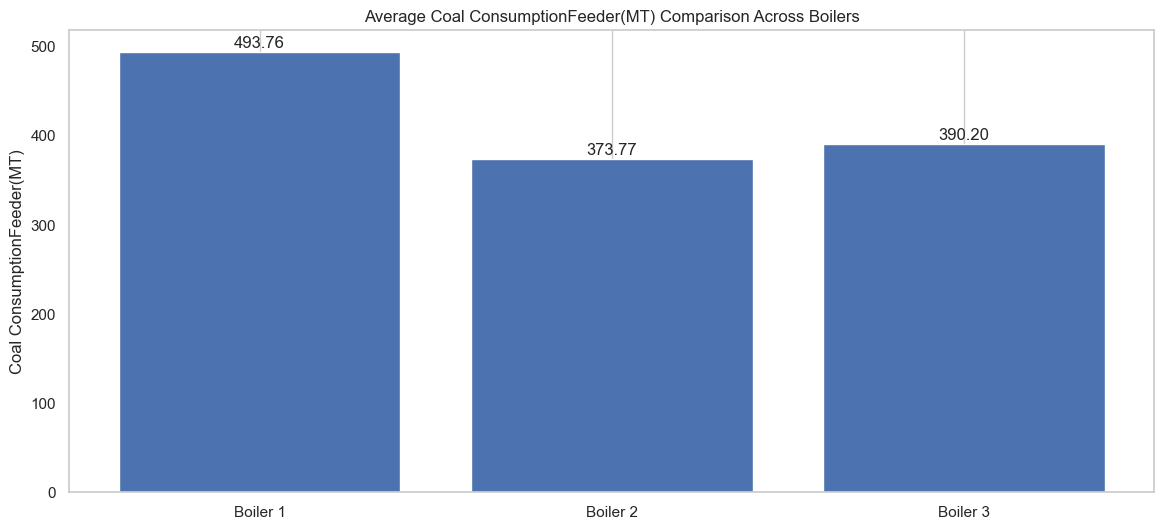

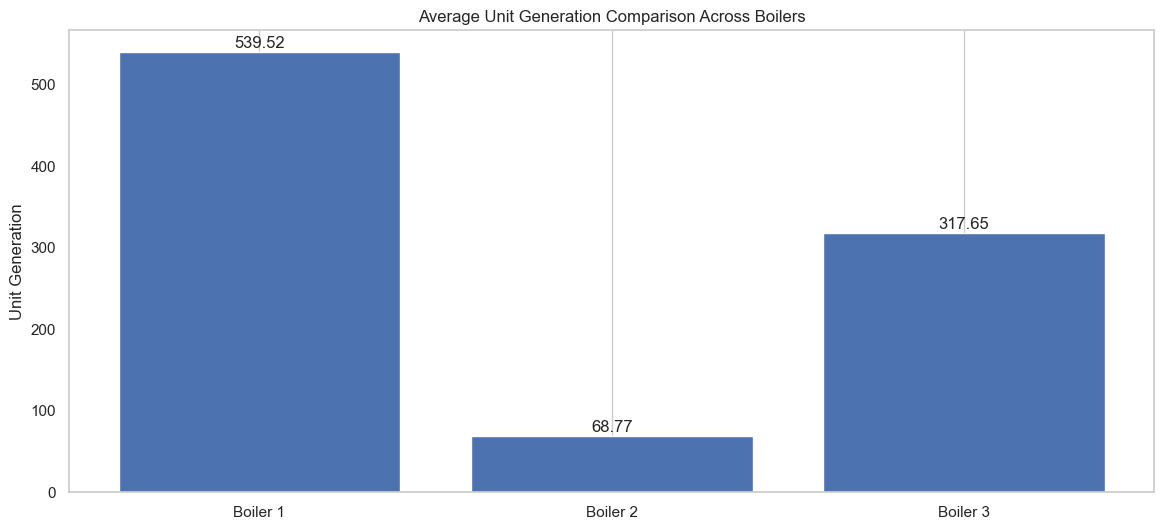

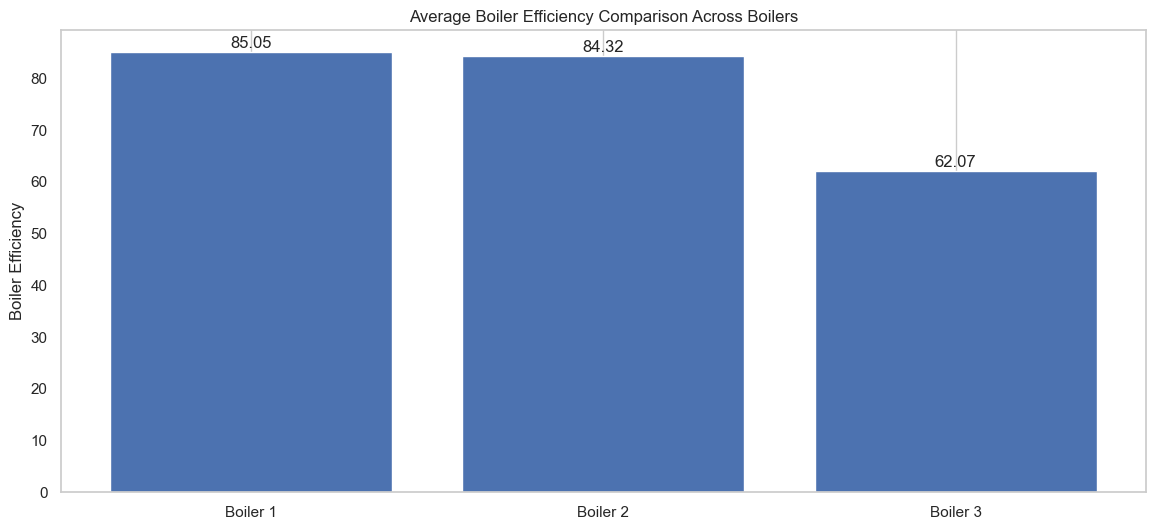

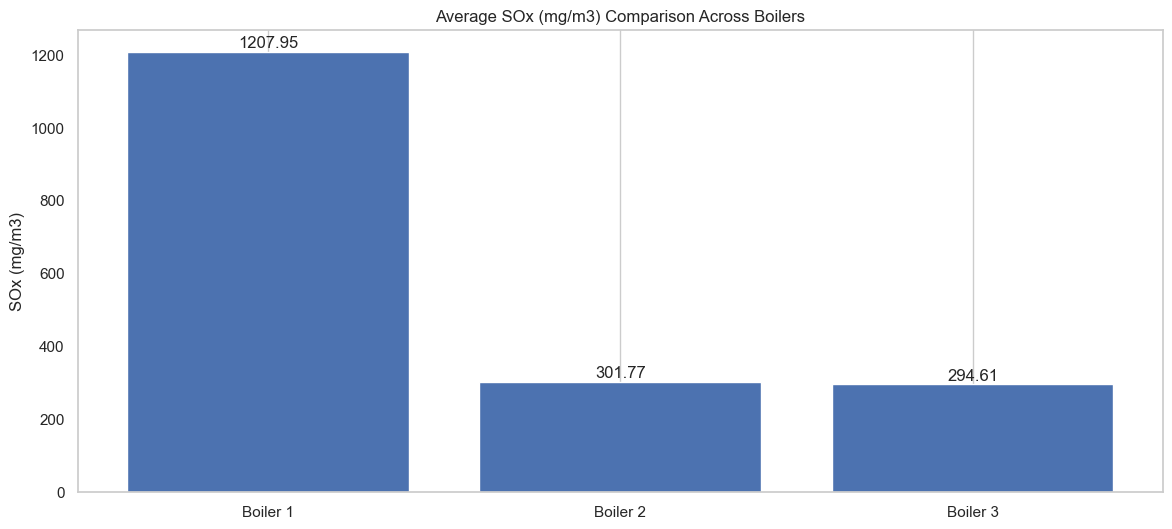

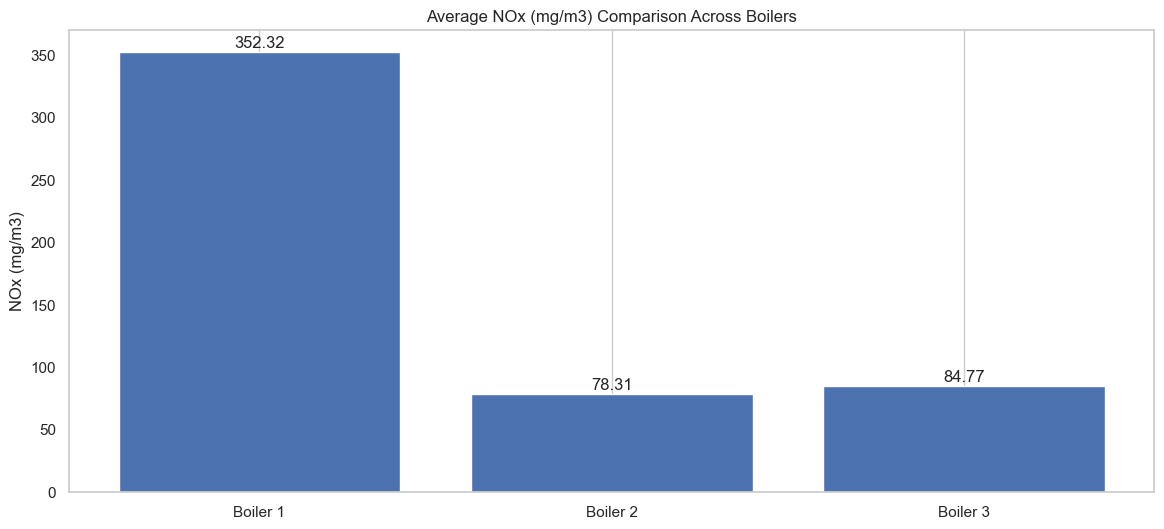

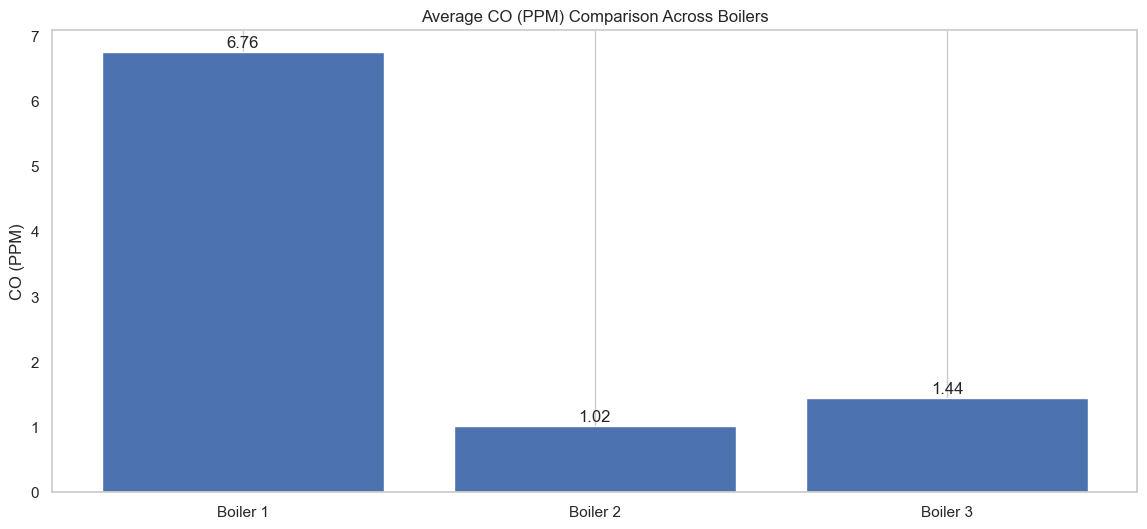

In [5]:
# Create a function to plot comparison of a metric across boilers
def plot_metric_comparison(metric):
    plt.figure(figsize=(14, 6))
    
    # Calculate average values for each boiler
    avg_values = [
        boiler1_df[metric].mean(),
        boiler2_df[metric].mean(),
        boiler3_df[metric].mean()
    ]
    
    # Create bar chart
    plt.bar(['Boiler 1', 'Boiler 2', 'Boiler 3'], avg_values)
    plt.title(f'Average {metric} Comparison Across Boilers')
    plt.ylabel(metric)
    plt.grid(axis='y')
    
    # Add value labels on top of bars
    for i, v in enumerate(avg_values):
        plt.text(i, v + 0.01*max(avg_values), f'{v:.2f}', ha='center')
    
    plt.show()

# Plot comparisons for key metrics
for metric in key_columns:
    plot_metric_comparison(metric)

## 5. Time Series Analysis of Key Metrics

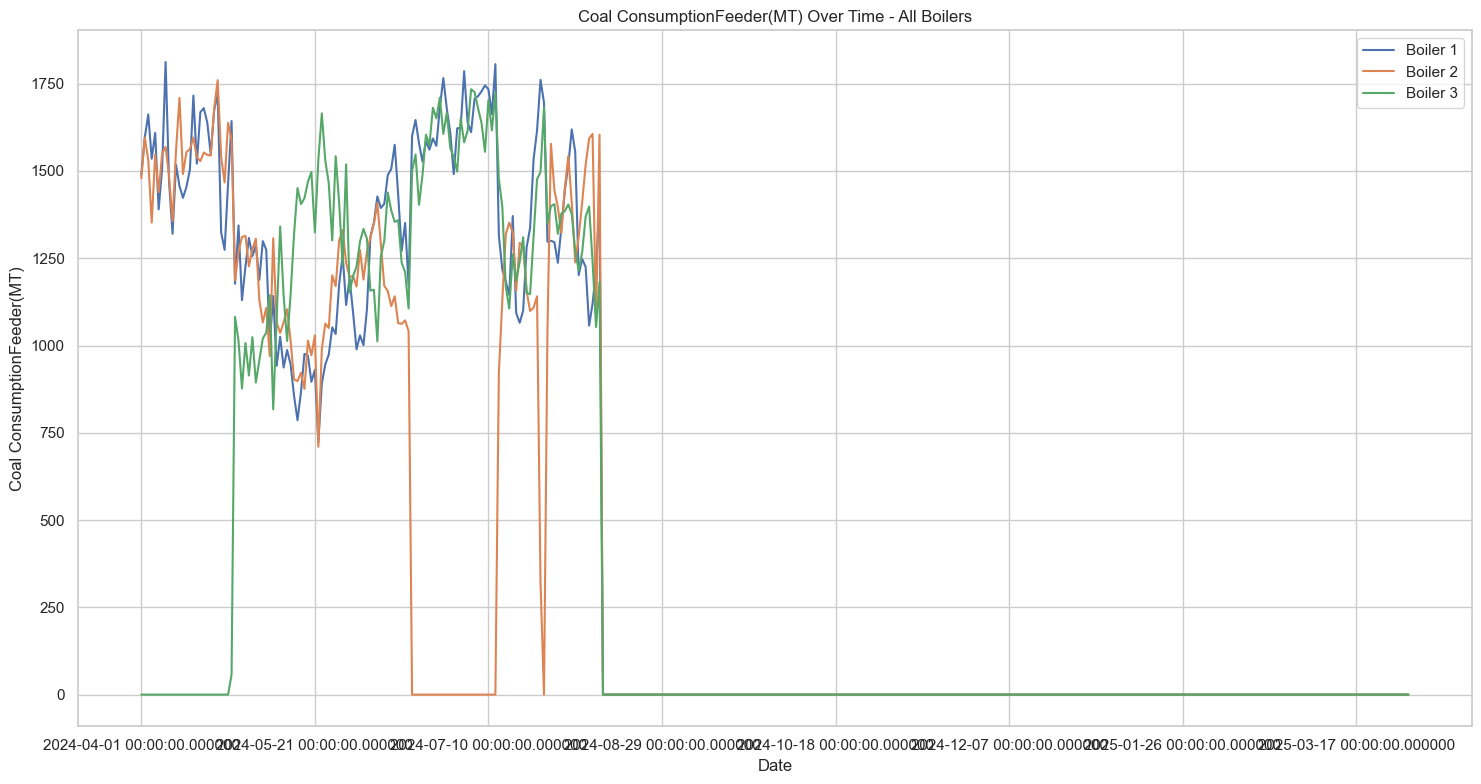

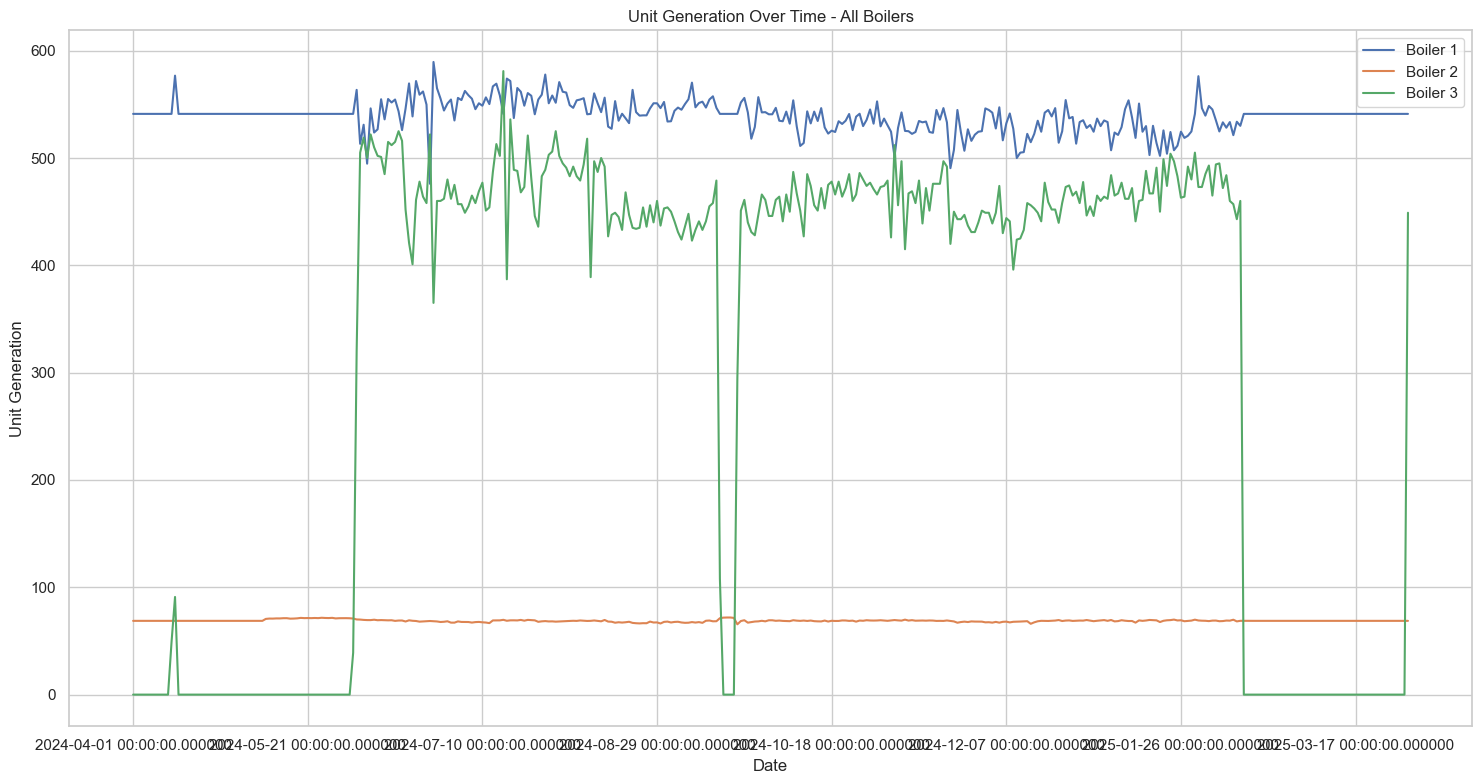

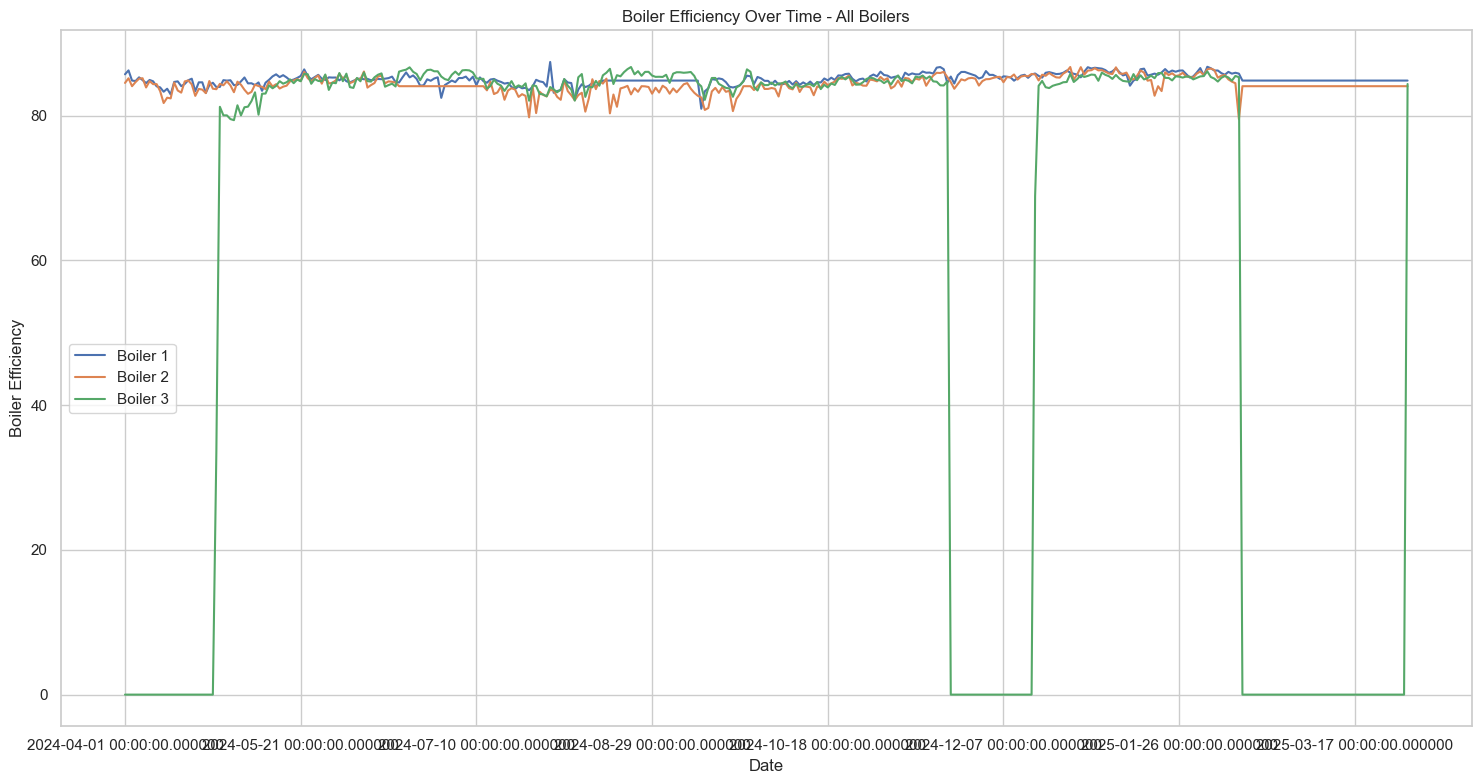

In [6]:
# Function to plot time series for a specific metric across all boilers
def plot_time_series(metric):
    plt.figure(figsize=(15, 8))
    
    # Set Date as index for time series analysis
    ts_df1 = boiler1_df.set_index('Date')
    ts_df2 = boiler2_df.set_index('Date')
    ts_df3 = boiler3_df.set_index('Date')
    
    # Plot time series for each boiler
    ts_df1[metric].plot(label='Boiler 1')
    ts_df2[metric].plot(label='Boiler 2')
    ts_df3[metric].plot(label='Boiler 3')
    
    plt.title(f'{metric} Over Time - All Boilers')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot time series for key metrics
for metric in key_columns[:3]:  # Limiting to first 3 metrics for brevity
    plot_time_series(metric)

## 6. Example Queries for Answering User Questions

### 6.1 "What is today's generation for each boiler?"

In [7]:
# Get the most recent date in the dataset
most_recent_date1 = boiler1_df['Date'].max()
most_recent_date2 = boiler2_df['Date'].max()
most_recent_date3 = boiler3_df['Date'].max()

print(f"Most recent date for Boiler 1: {most_recent_date1}")
print(f"Most recent date for Boiler 2: {most_recent_date2}")
print(f"Most recent date for Boiler 3: {most_recent_date3}")

# Query for today's generation for each boiler
today_gen1 = boiler1_df[boiler1_df['Date'] == most_recent_date1]['Unit Generation'].values[0]
today_gen2 = boiler2_df[boiler2_df['Date'] == most_recent_date2]['Unit Generation'].values[0]
today_gen3 = boiler3_df[boiler3_df['Date'] == most_recent_date3]['Unit Generation'].values[0]

print(f"\nToday's generation for Boiler 1: {today_gen1} units")
print(f"Today's generation for Boiler 2: {today_gen2} units")
print(f"Today's generation for Boiler 3: {today_gen3} units")
print(f"Total generation across all boilers: {today_gen1 + today_gen2 + today_gen3} units")

Most recent date for Boiler 1: 2025-04-01 00:00:00.000000
Most recent date for Boiler 2: 2025-04-01 00:00:00.000000
Most recent date for Boiler 3: 2025-04-01 00:00:00.000000

Today's generation for Boiler 1: 541.125 units
Today's generation for Boiler 2: 68.73563386396127 units
Today's generation for Boiler 3: 449.0 units
Total generation across all boilers: 1058.8606338639613 units


### 6.2 "Which loss is impacting efficiency the most for each boiler?"

Loss columns in Boiler 1: ['Loss Due to Dry Flue Gas', 'Loss due to H2O in fuel', 'Loss due to H2 in fuel', 'Loss due to H2O in Air', 'Partial Combustion Loss', 'ESP Ash for Unburnt Loss', 'Bottom Ash for Unburnt Loss', 'Total Unburnt Loss', 'ESP Ash for Sensible Heat Loss', 'Bottom Ash for Sensible Heat Loss', 'Total Sensisble Loss', 'Radiation Loss', 'Total Loss', 'Other Losses  Plant Specific']

Average values for each loss type in Boiler 1 (sorted by impact):


Total Loss                           10.765533
Loss Due to Dry Flue Gas              3.681588
Loss due to H2 in fuel                3.374464
Loss due to H2O in fuel               1.679649
Total Unburnt Loss                    0.777558
Radiation Loss                        0.646448
Total Sensisble Loss                  0.605330
ESP Ash for Unburnt Loss              0.507276
Other Losses  Plant Specific          0.497268
Bottom Ash for Sensible Heat Loss     0.475312
Bottom Ash for Unburnt Loss           0.270281
Loss due to H2O in Air                0.137236
ESP Ash for Sensible Heat Loss        0.130018
Partial Combustion Loss               0.005988
dtype: float64

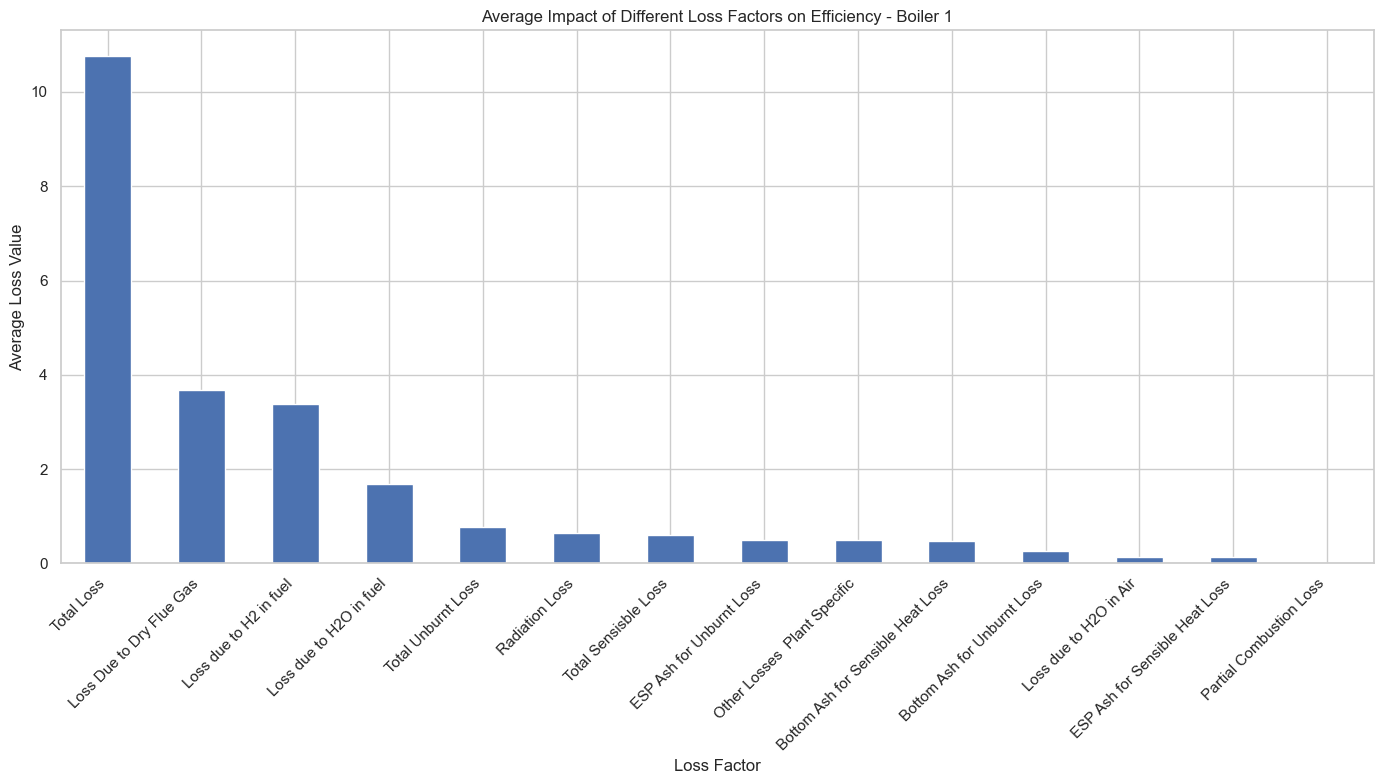

Loss columns in Boiler 2: ['Loss Due to Dry Flue Gas', 'Loss due to H2O in fuel', 'Loss due to H2 in fuel', 'Loss due to H2O in Air', 'Partial Combustion Loss', 'ESP Ash for Unburnt Loss', 'Bottom Ash for Unburnt Loss', 'Total Unburnt Loss', 'ESP Ash for Sensible Heat Loss', 'Bottom Ash for Sensible Heat Loss', 'Total Sensisble Loss', 'Radiation Loss', 'Total Loss', 'Other Losses  Plant Specific']

Average values for each loss type in Boiler 2 (sorted by impact):


Total Loss                           10.993067
Loss Due to Dry Flue Gas              3.610754
Loss due to H2 in fuel                3.379375
Loss due to H2O in fuel               1.687134
Total Unburnt Loss                    1.029534
ESP Ash for Unburnt Loss              0.658925
Radiation Loss                        0.650000
Total Sensisble Loss                  0.636168
Bottom Ash for Sensible Heat Loss     0.509028
Other Losses  Plant Specific          0.500000
Bottom Ash for Unburnt Loss           0.370543
Loss due to H2O in Air                0.134203
ESP Ash for Sensible Heat Loss        0.127132
Partial Combustion Loss               0.005960
dtype: float64

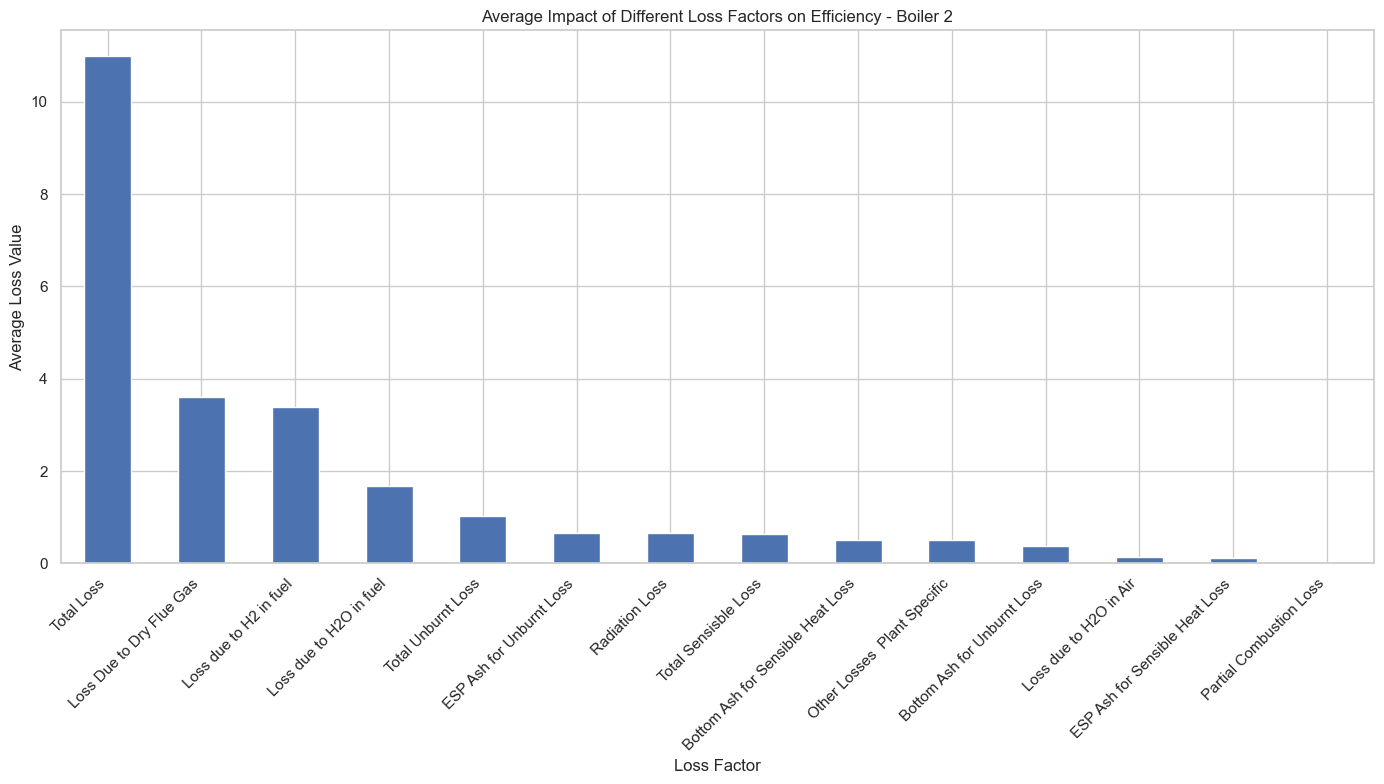

Loss columns in Boiler 3: ['Loss Due to Dry Flue Gas', 'Loss due to H2O in fuel', 'Loss due to H2 in fuel', 'Loss due to H2O in Air', 'Partial Combustion Loss', 'ESP Ash for Unburnt Loss', 'Bottom Ash for Unburnt Loss', 'Total Unburnt Loss', 'ESP Ash for Sensible Heat Loss', 'Bottom Ash for Sensible Heat Loss', 'Total Sensisble Loss', 'Radiation Loss', 'Total Loss', 'Other Losses  Plant Specific']

Average values for each loss type in Boiler 3 (sorted by impact):


Total Loss                           10.183013
Loss Due to Dry Flue Gas              3.573441
Loss due to H2 in fuel                3.163810
Loss due to H2O in fuel               1.619407
Radiation Loss                        0.650000
Total Unburnt Loss                    0.649627
Total Sensisble Loss                  0.573362
Other Losses  Plant Specific          0.500000
Bottom Ash for Sensible Heat Loss     0.446956
ESP Ash for Unburnt Loss              0.428951
Bottom Ash for Unburnt Loss           0.220697
ESP Ash for Sensible Heat Loss        0.126395
Loss due to H2O in Air                0.118868
Partial Combustion Loss               0.005403
dtype: float64

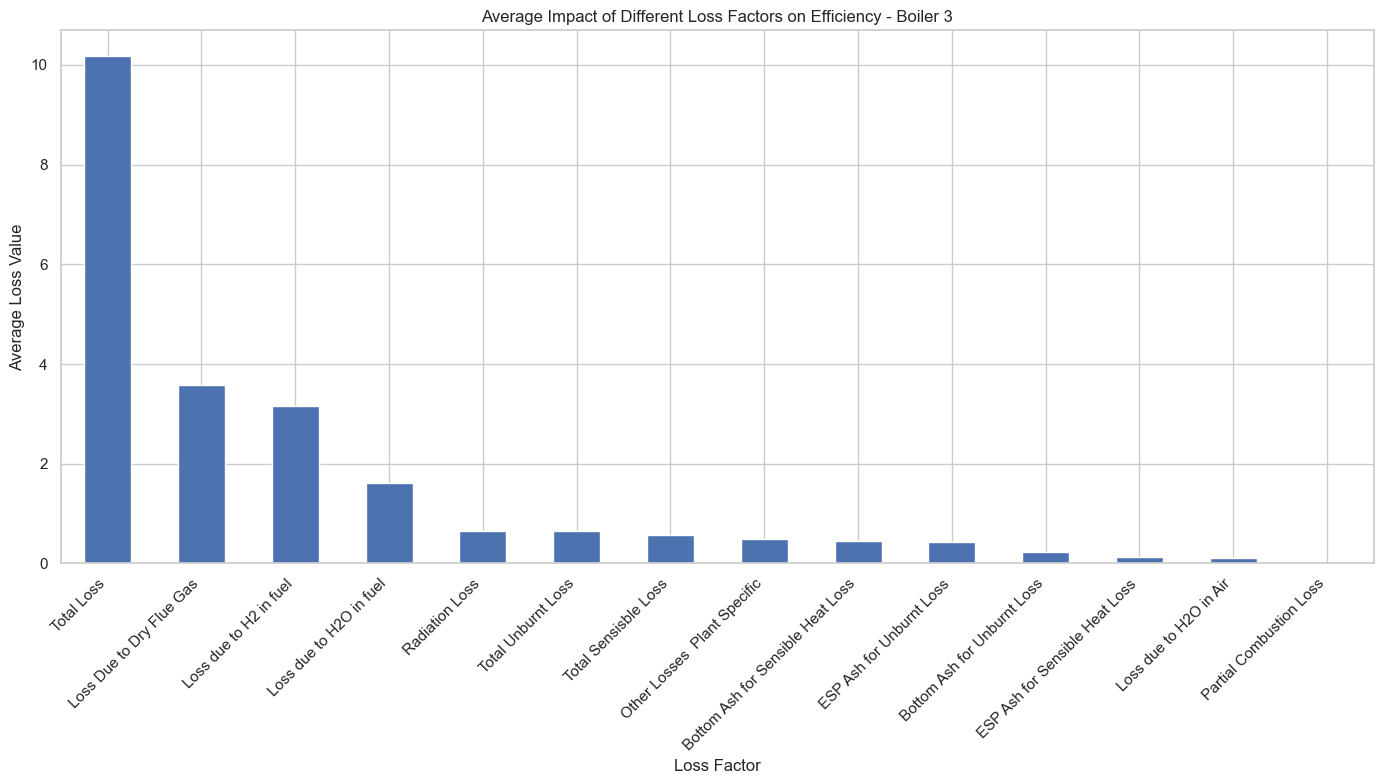


Summary of highest impact loss factors:
Boiler 1: Total Loss with average value of 10.77
Boiler 2: Total Loss with average value of 10.99
Boiler 3: Total Loss with average value of 10.18


In [9]:
# Function to analyze loss factors for a boiler
def analyze_loss_factors(df, boiler_name):
    # Identify loss columns
    loss_columns = [col for col in df.columns if 'Loss' in col]
    print(f"Loss columns in {boiler_name}: {loss_columns}")
    
    # Calculate average values for each loss column
    loss_averages = df[loss_columns].mean().sort_values(ascending=False)
    print(f"\nAverage values for each loss type in {boiler_name} (sorted by impact):")
    display(loss_averages)
    
    # Visualize the loss factors
    plt.figure(figsize=(14, 8))
    loss_averages.plot(kind='bar')
    plt.title(f'Average Impact of Different Loss Factors on Efficiency - {boiler_name}')
    plt.xlabel('Loss Factor')
    plt.ylabel('Average Loss Value')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return loss_averages.index[0], loss_averages.iloc[0]

# Analyze loss factors for each boiler
highest_loss1, value1 = analyze_loss_factors(boiler1_df, "Boiler 1")
highest_loss2, value2 = analyze_loss_factors(boiler2_df, "Boiler 2")
highest_loss3, value3 = analyze_loss_factors(boiler3_df, "Boiler 3")

print("\nSummary of highest impact loss factors:")
print(f"Boiler 1: {highest_loss1} with average value of {value1:.2f}")
print(f"Boiler 2: {highest_loss2} with average value of {value2:.2f}")
print(f"Boiler 3: {highest_loss3} with average value of {value3:.2f}")

### 6.3 "What was the steam temperature average for the last week for each boiler?"

Converted Date column to datetime for Boiler 1
Average steam temperature for Boiler 1 for the last week: 0.00 degrees
Converted Date column to datetime for Boiler 2
Average steam temperature for Boiler 2 for the last week: 491.30 degrees
Converted Date column to datetime for Boiler 3
Average steam temperature for Boiler 3 for the last week: 69.86 degrees


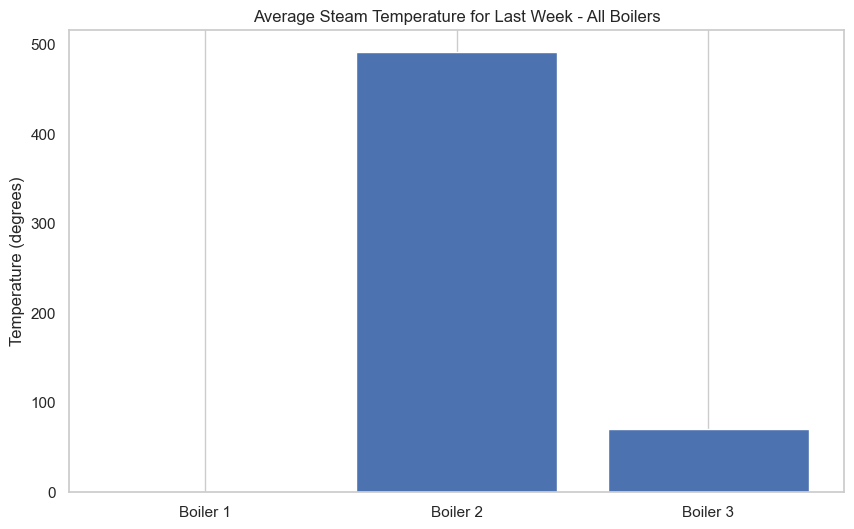

In [8]:
# Function to calculate average steam temperature for the last week
def calc_avg_steam_temp(df, boiler_name):
    # Ensure Date column is in datetime format
    if df['Date'].dtype == 'object':  # If Date is stored as string
        df['Date'] = pd.to_datetime(df['Date'])
        print(f"Converted Date column to datetime for {boiler_name}")
    
    # Get the last 7 days of data
    last_date = df['Date'].max()
    one_week_ago = last_date - pd.Timedelta(days=7)
    last_week_data = df[(df['Date'] > one_week_ago) & (df['Date'] <= last_date)]
    
    # Check if we have data for the last week
    if len(last_week_data) == 0:
        print(f"Warning: No data found for {boiler_name} in the last week!")
        return None
    
    # Calculate average steam temperature for the last week
    avg_steam_temp = last_week_data['Steam temp at boiler outlet'].mean()
    print(f"Average steam temperature for {boiler_name} for the last week: {avg_steam_temp:.2f} degrees")
    return avg_steam_temp

# Calculate for each boiler
avg_temp1 = calc_avg_steam_temp(boiler1_df, "Boiler 1")
avg_temp2 = calc_avg_steam_temp(boiler2_df, "Boiler 2")
avg_temp3 = calc_avg_steam_temp(boiler3_df, "Boiler 3")

# Compare the results (making sure to handle any None values)
temps = [avg_temp1, avg_temp2, avg_temp3]
boiler_names = ['Boiler 1', 'Boiler 2', 'Boiler 3']

# Filter out None values
valid_temps = [(name, temp) for name, temp in zip(boiler_names, temps) if temp is not None]

if valid_temps:
    names, values = zip(*valid_temps)
    
    plt.figure(figsize=(10, 6))
    plt.bar(names, values)
    plt.title('Average Steam Temperature for Last Week - All Boilers')
    plt.ylabel('Temperature (degrees)')
    plt.grid(axis='y')
    plt.show()
else:
    print("No valid temperature data to display.")

## 7. Monthly Trends Analysis

Monthly statistics by boiler:


,Sheet_Source,Month,Coal ConsumptionFeeder(MT),Unit Generation,Boiler Efficiency,SOx (mg/m3),NOx (mg/m3),CO (PPM),Month_Name
0,Bol2,1,0.0,2136.610255,85.537936,0.000000,0.000000,0.000000,Jan
1,Bol2,2,0.0,1925.517221,84.516421,0.000000,0.000000,0.000000,Feb
2,Bol2,3,0.0,2130.804650,84.082544,0.000000,0.000000,0.000000,Mar
3,Bol2,4,45530.0,2130.804650,84.009009,997.677419,347.096774,1.483871,Apr
4,Bol2,5,33853.0,2186.664107,84.443489,1054.556566,292.003630,4.230699,May


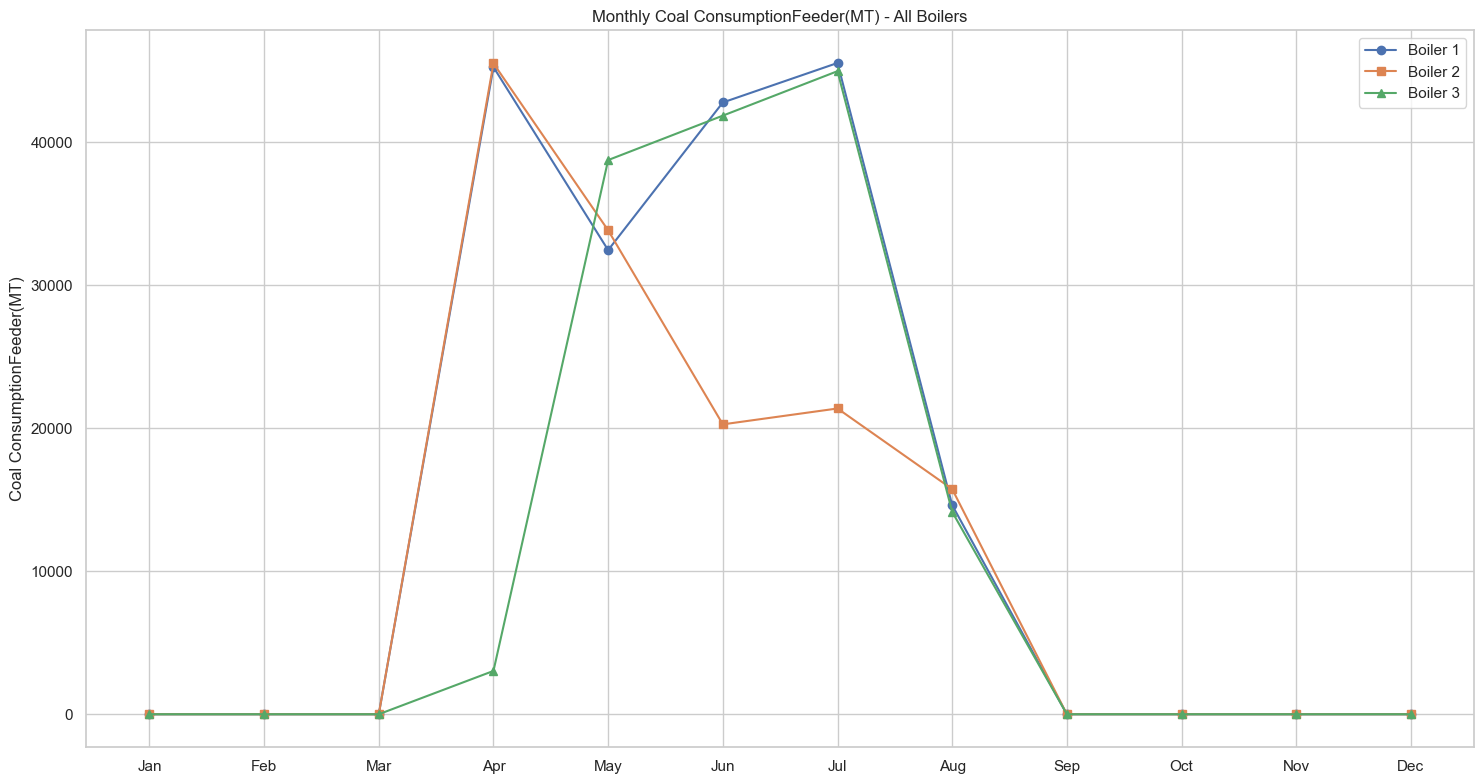

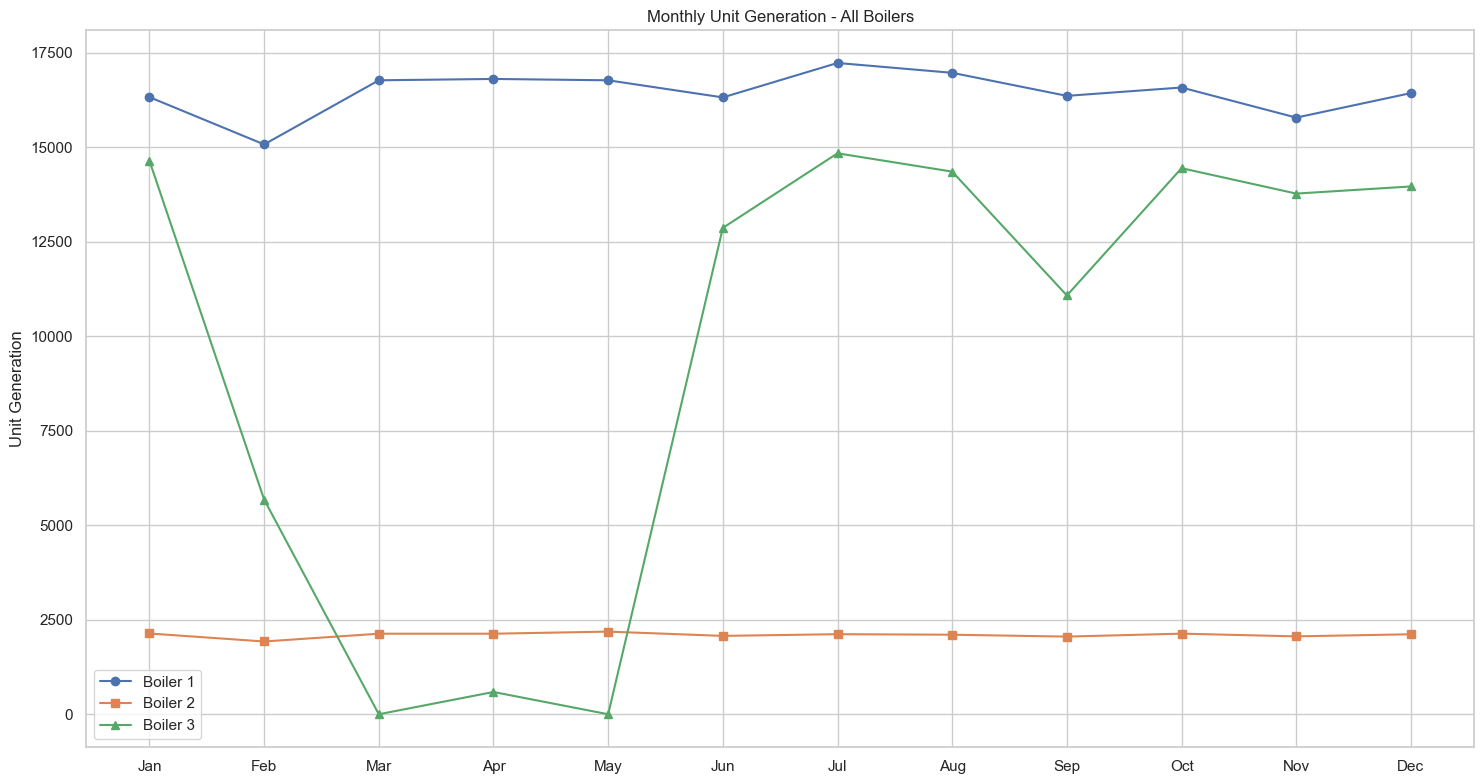

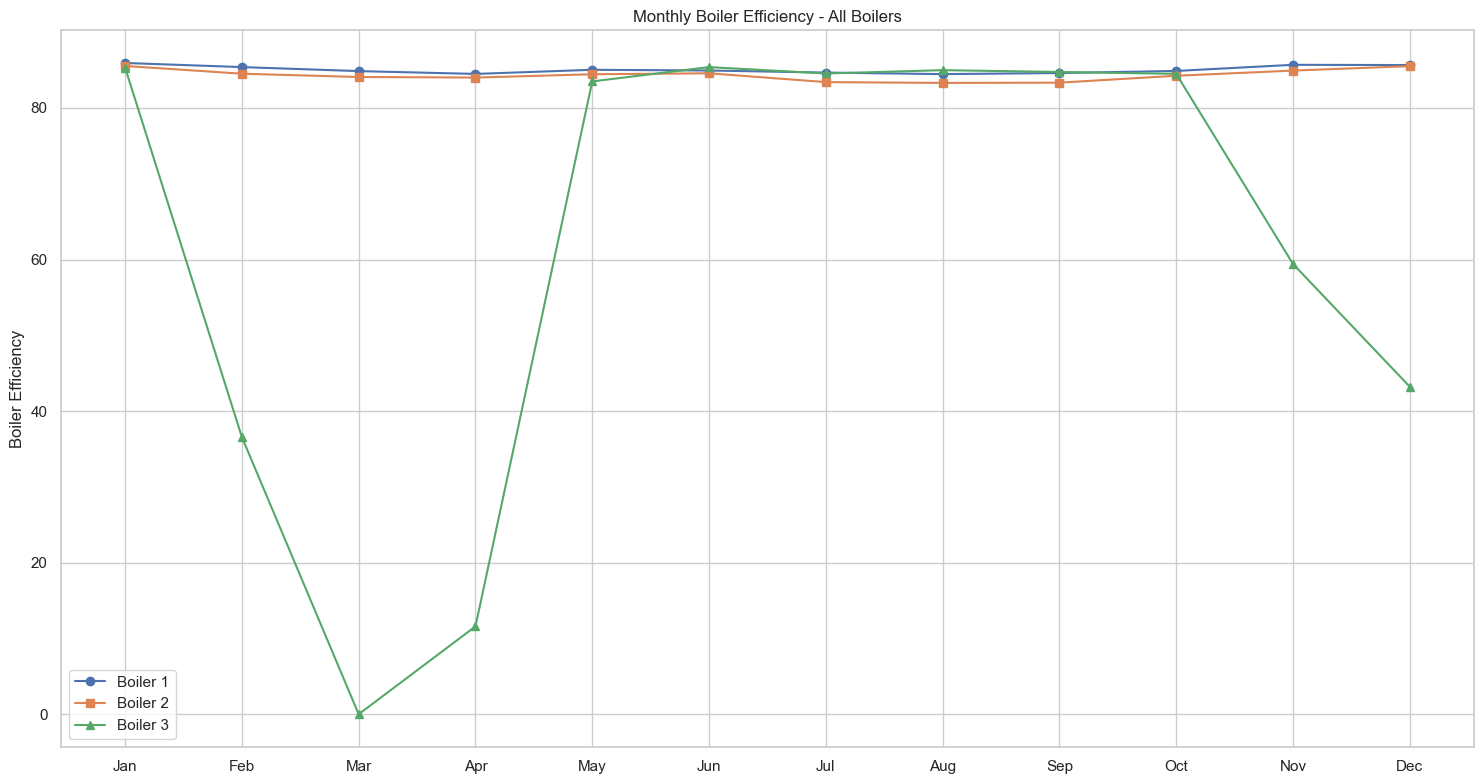

In [9]:
# Load the monthly stats table
monthly_df = pd.read_sql("SELECT * FROM monthly_stats", conn)

# Map month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_df['Month_Name'] = monthly_df['Month'].map(month_names)

# Display the monthly stats
print("Monthly statistics by boiler:")
display(monthly_df.head())

# Plot monthly trends for each boiler
for metric in ['Coal ConsumptionFeeder(MT)', 'Unit Generation', 'Boiler Efficiency']:
    plt.figure(figsize=(15, 8))
    
    # Filter data for each boiler
    boiler1_monthly = monthly_df[monthly_df['Sheet_Source'] == 'Bolr 1'].sort_values('Month')
    boiler2_monthly = monthly_df[monthly_df['Sheet_Source'] == 'Bol2'].sort_values('Month')
    boiler3_monthly = monthly_df[monthly_df['Sheet_Source'] == 'Bolr 3'].sort_values('Month')
    
    # Plot for each boiler
    plt.plot(boiler1_monthly['Month_Name'], boiler1_monthly[metric], marker='o', label='Boiler 1')
    plt.plot(boiler2_monthly['Month_Name'], boiler2_monthly[metric], marker='s', label='Boiler 2')
    plt.plot(boiler3_monthly['Month_Name'], boiler3_monthly[metric], marker='^', label='Boiler 3')
    
    plt.title(f'Monthly {metric} - All Boilers')
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

## 8. Correlation Analysis for Each Boiler

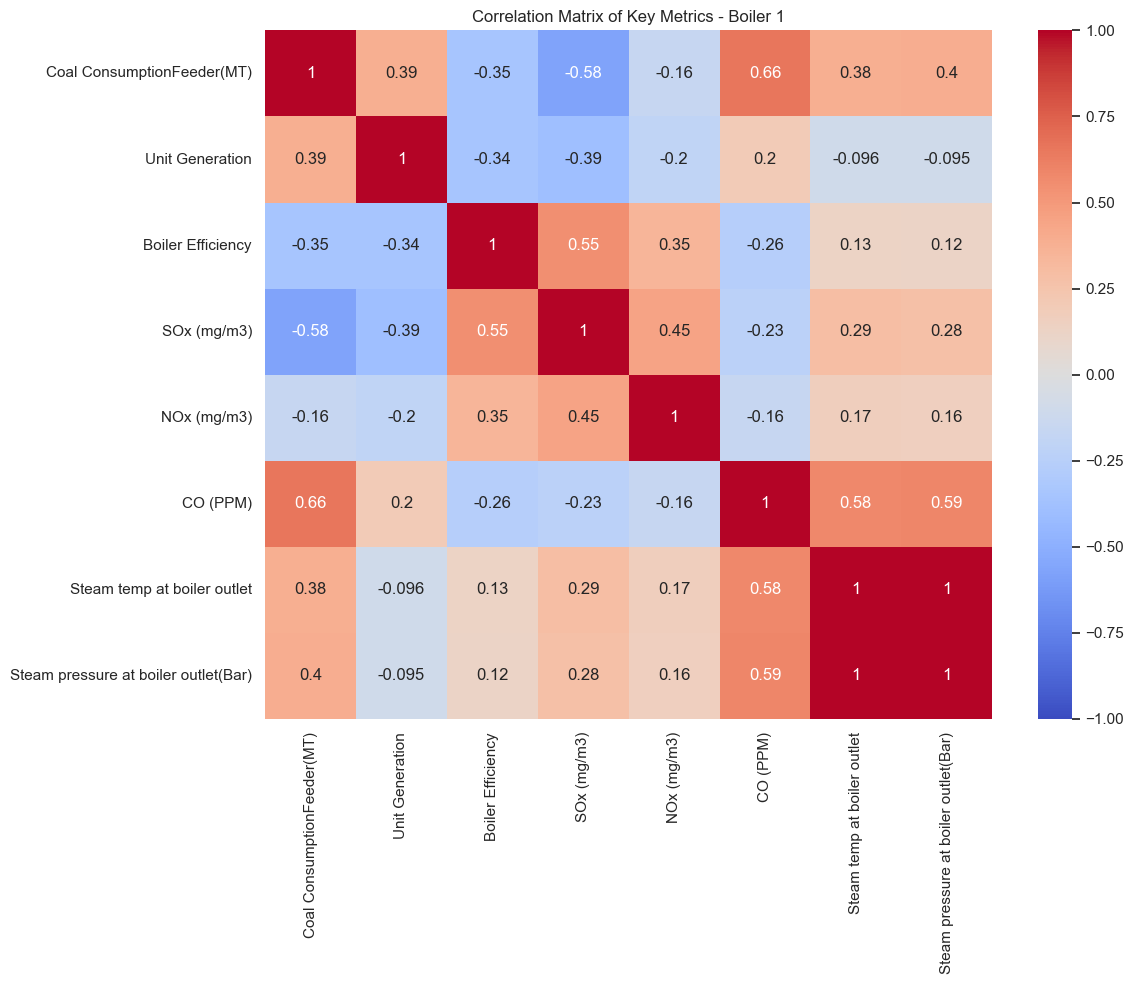

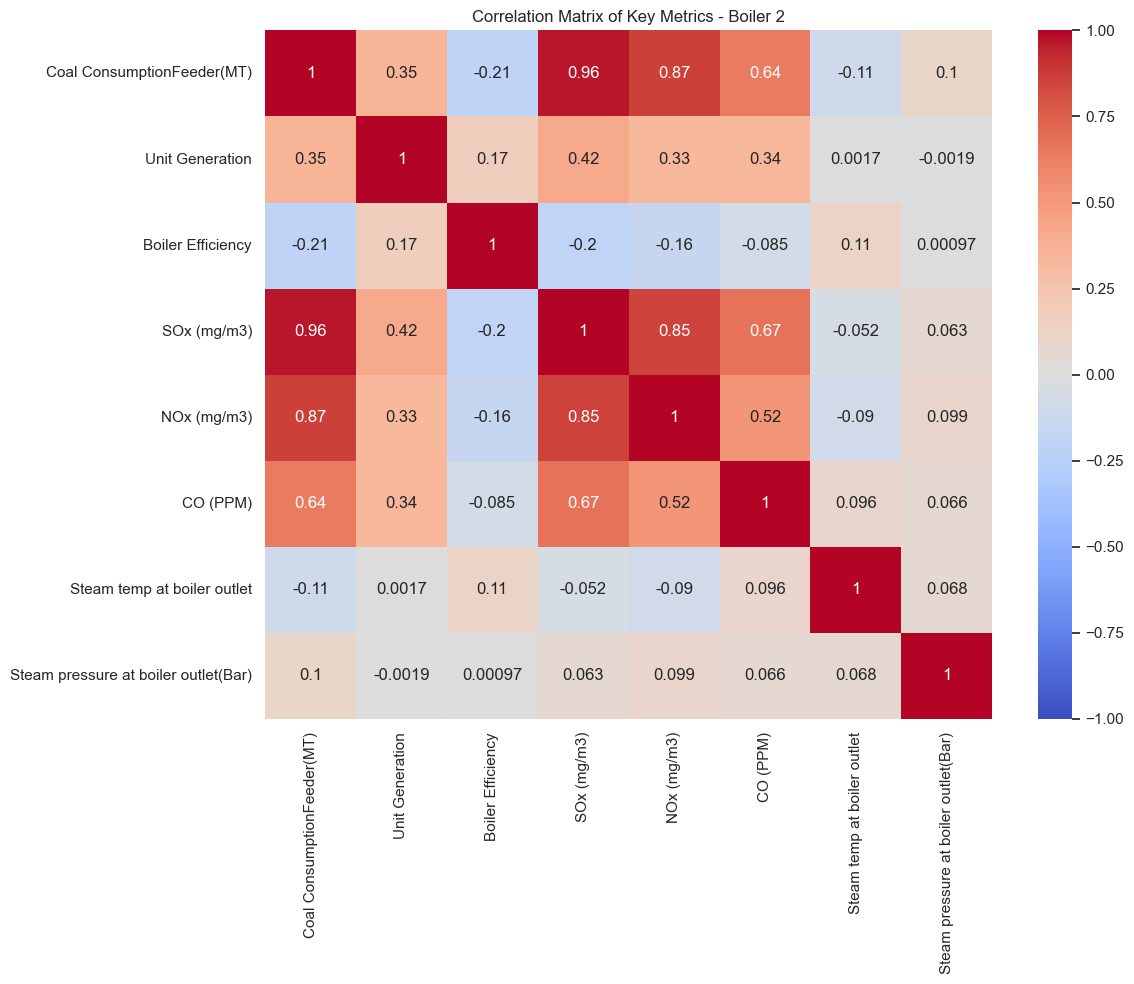

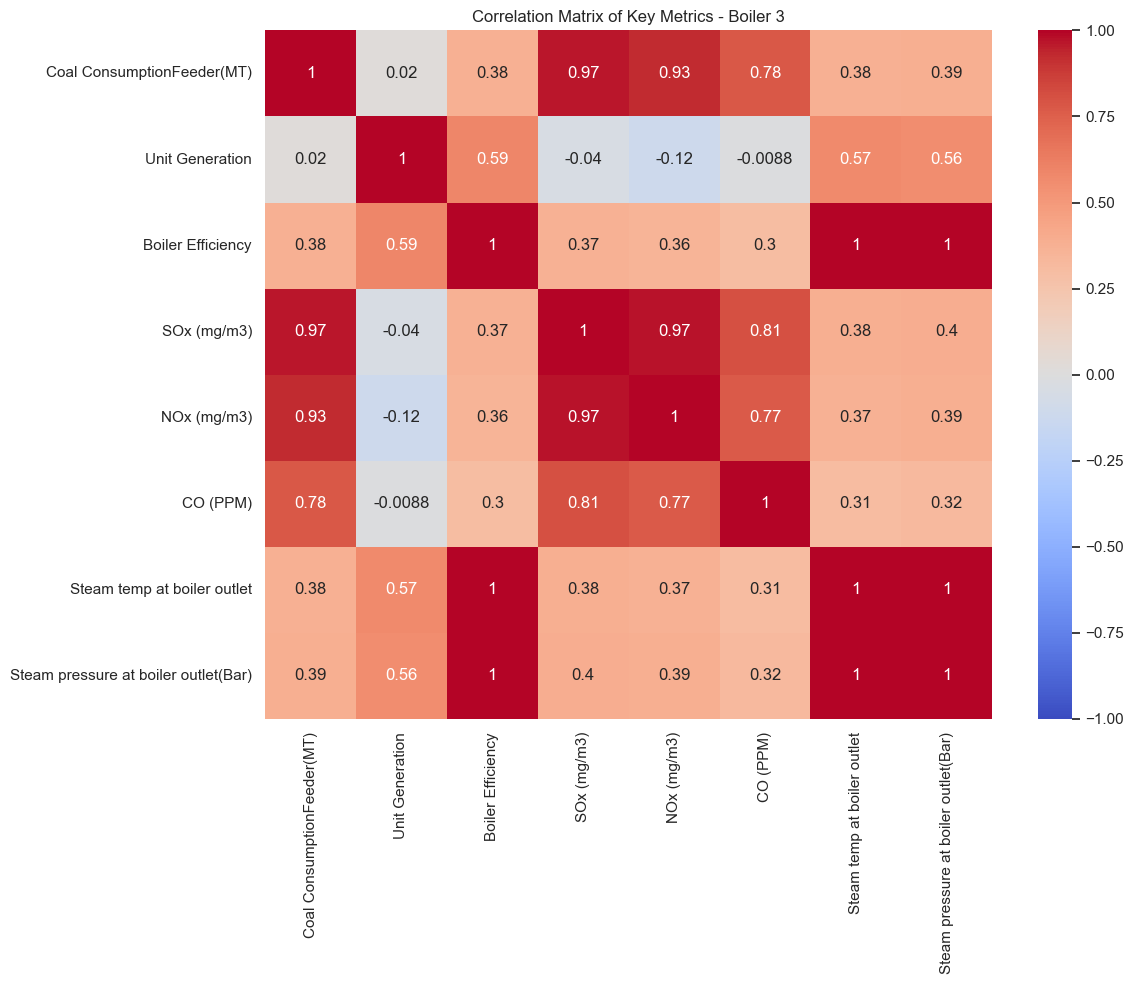

In [10]:
# Function to perform correlation analysis for a boiler
def correlation_analysis(df, boiler_name):
    # Select key columns for correlation analysis
    corr_columns = [
        'Coal ConsumptionFeeder(MT)', 
        'Unit Generation', 
        'Boiler Efficiency',
        'SOx (mg/m3)', 
        'NOx (mg/m3)', 
        'CO (PPM)',
        'Steam temp at boiler outlet',
        'Steam pressure at boiler outlet(Bar)'
    ]
    
    # Calculate correlation matrix
    corr_matrix = df[corr_columns].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Matrix of Key Metrics - {boiler_name}')
    plt.tight_layout()
    plt.show()

# Perform correlation analysis for each boiler
correlation_analysis(boiler1_df, "Boiler 1")
correlation_analysis(boiler2_df, "Boiler 2")
correlation_analysis(boiler3_df, "Boiler 3")

## 9. Efficiency Analysis

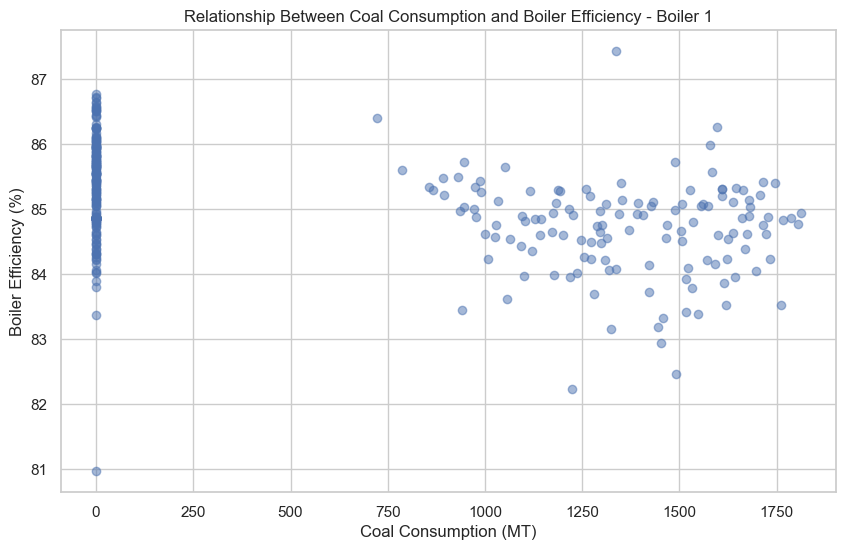

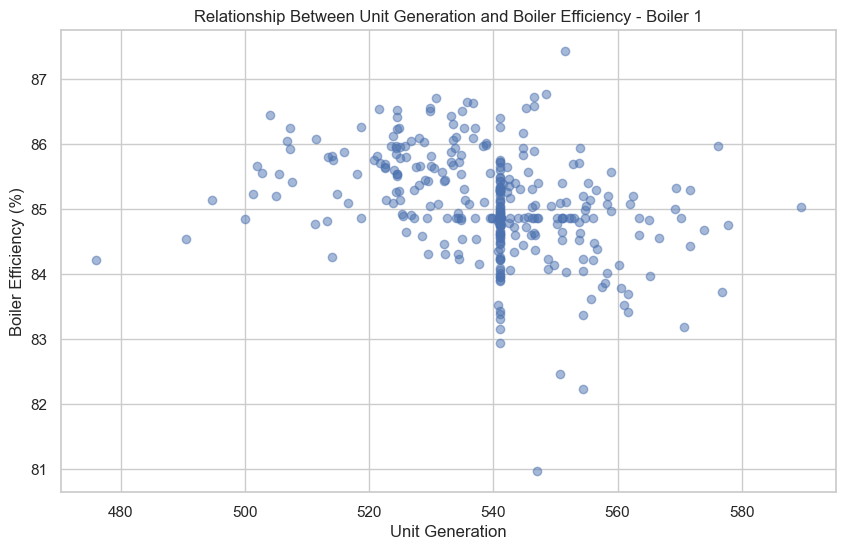

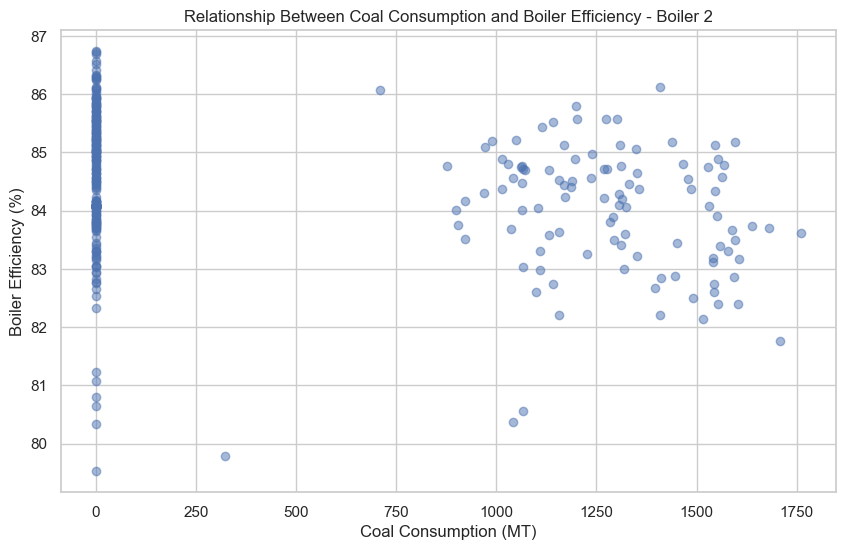

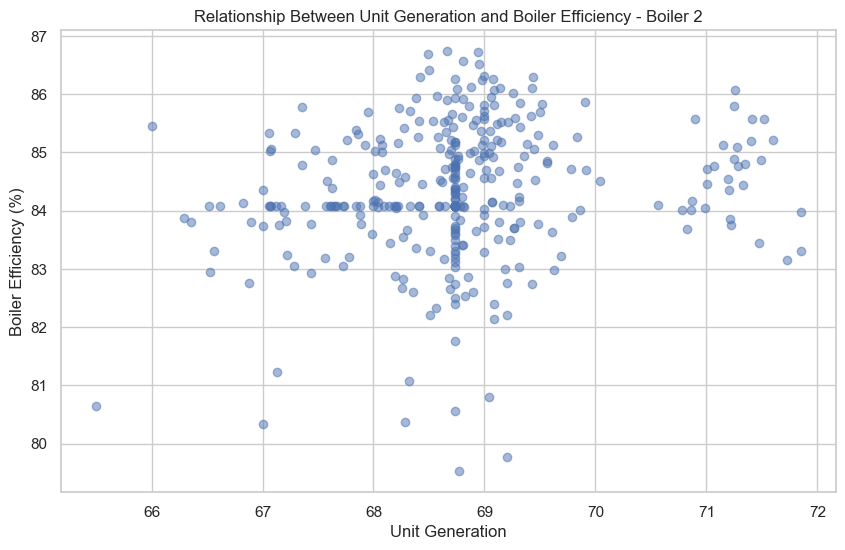

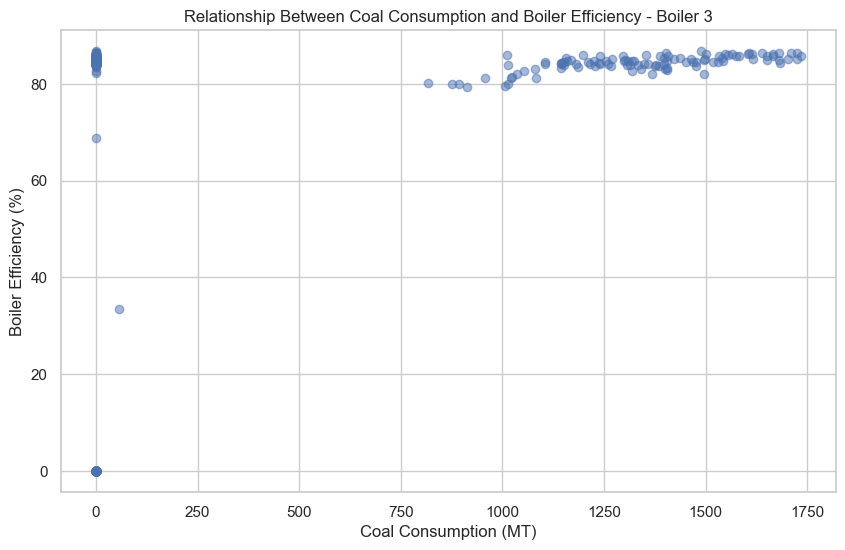

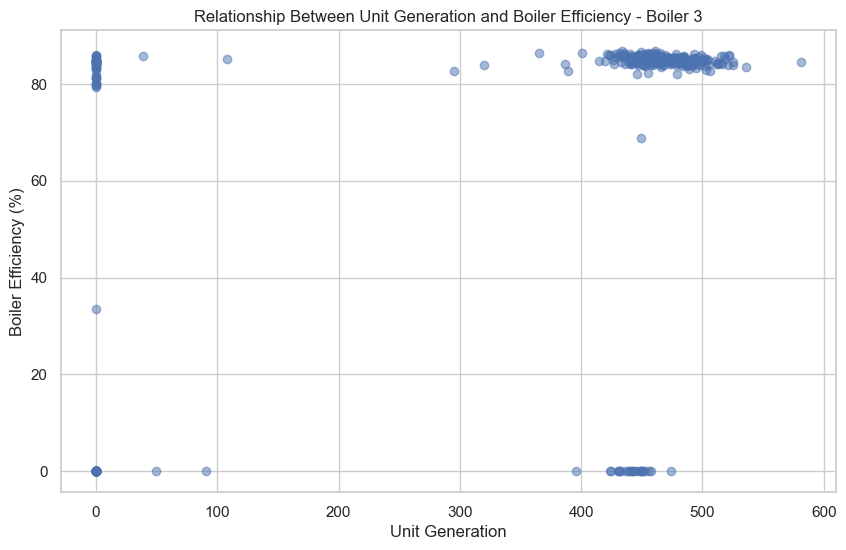

In [14]:
# Function to analyze efficiency relationships
def efficiency_analysis(df, boiler_name):
    # Analyze the relationship between coal consumption and efficiency
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Coal ConsumptionFeeder(MT)'], df['Boiler Efficiency'], alpha=0.5)
    plt.title(f'Relationship Between Coal Consumption and Boiler Efficiency - {boiler_name}')
    plt.xlabel('Coal Consumption (MT)')
    plt.ylabel('Boiler Efficiency (%)')
    plt.grid(True)
    plt.show()
    
    # Analyze the relationship between unit generation and efficiency
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Unit Generation'], df['Boiler Efficiency'], alpha=0.5)
    plt.title(f'Relationship Between Unit Generation and Boiler Efficiency - {boiler_name}')
    plt.xlabel('Unit Generation')
    plt.ylabel('Boiler Efficiency (%)')
    plt.grid(True)
    plt.show()

# Perform efficiency analysis for each boiler
efficiency_analysis(boiler1_df, "Boiler 1")
efficiency_analysis(boiler2_df, "Boiler 2")
efficiency_analysis(boiler3_df, "Boiler 3")

## 10. Emissions Analysis

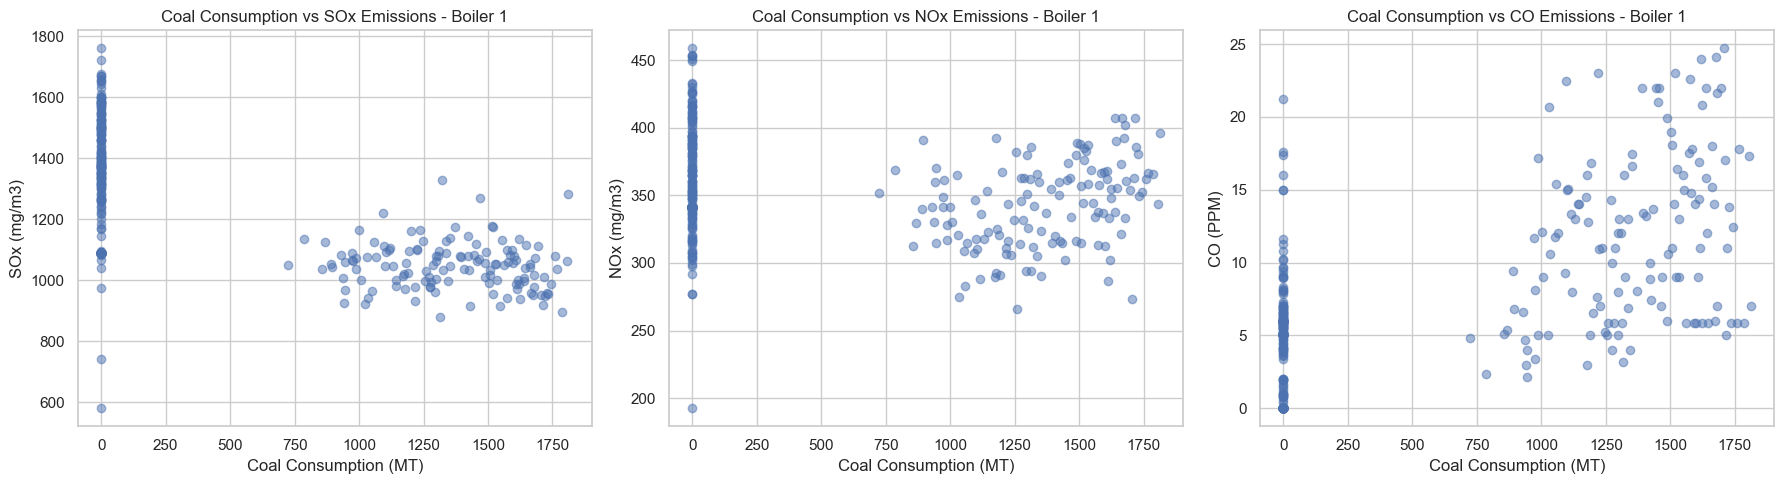

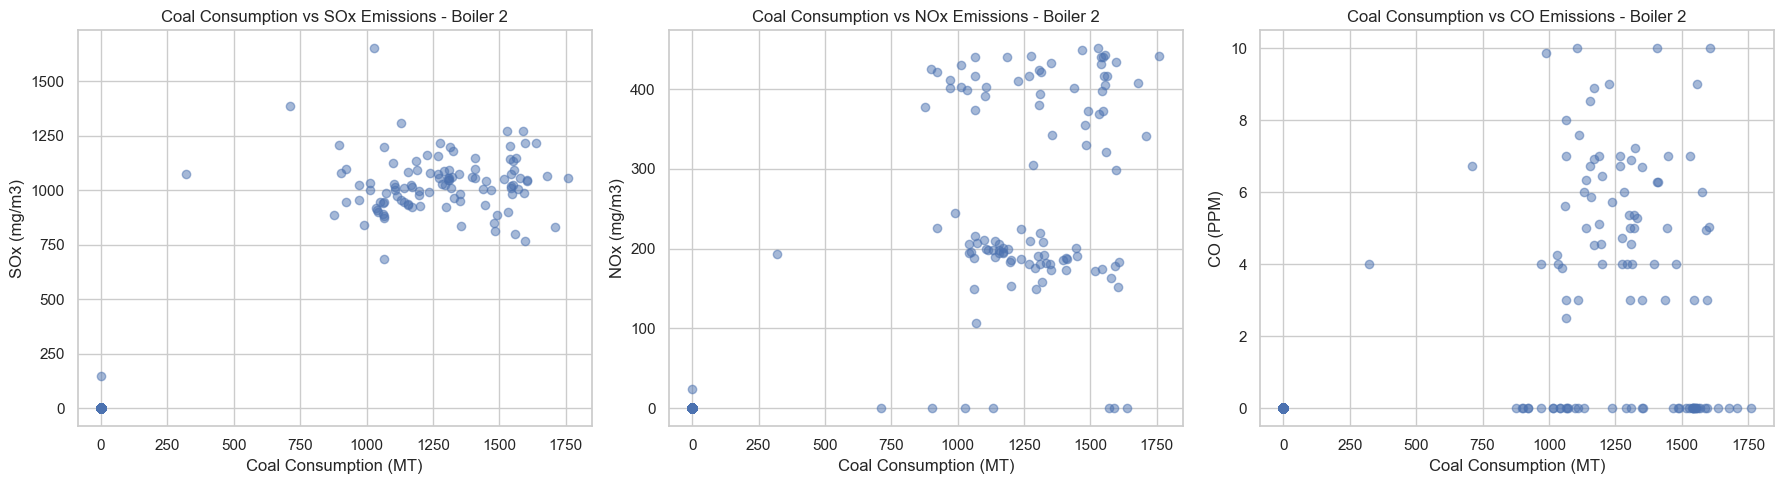

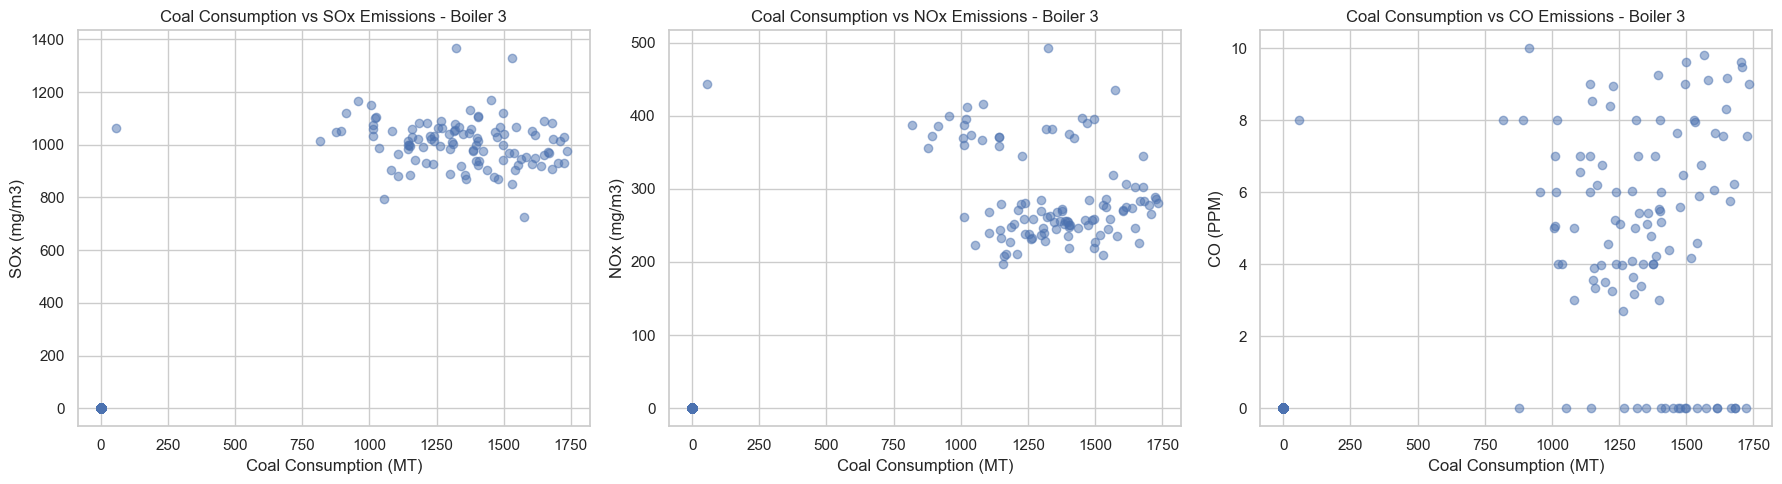

In [11]:
# Function to analyze emissions
def emissions_analysis(df, boiler_name):
    # Analyze the relationship between coal consumption and emissions
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # SOx vs Coal Consumption
    axes[0].scatter(df['Coal ConsumptionFeeder(MT)'], df['SOx (mg/m3)'], alpha=0.5)
    axes[0].set_title(f'Coal Consumption vs SOx Emissions - {boiler_name}')
    axes[0].set_xlabel('Coal Consumption (MT)')
    axes[0].set_ylabel('SOx (mg/m3)')
    axes[0].grid(True)
    
    # NOx vs Coal Consumption
    axes[1].scatter(df['Coal ConsumptionFeeder(MT)'], df['NOx (mg/m3)'], alpha=0.5)
    axes[1].set_title(f'Coal Consumption vs NOx Emissions - {boiler_name}')
    axes[1].set_xlabel('Coal Consumption (MT)')
    axes[1].set_ylabel('NOx (mg/m3)')
    axes[1].grid(True)
    
    # CO vs Coal Consumption
    axes[2].scatter(df['Coal ConsumptionFeeder(MT)'], df['CO (PPM)'], alpha=0.5)
    axes[2].set_title(f'Coal Consumption vs CO Emissions - {boiler_name}')
    axes[2].set_xlabel('Coal Consumption (MT)')
    axes[2].set_ylabel('CO (PPM)')
    axes[2].grid(True)
    
    plt.tight_layout()
    plt.show()

# Perform emissions analysis for each boiler
emissions_analysis(boiler1_df, "Boiler 1")
emissions_analysis(boiler2_df, "Boiler 2")
emissions_analysis(boiler3_df, "Boiler 3")

## 11. Summary of Insights

Based on the analysis above, we can draw the following insights for each boiler:

### Boiler 1
1. **Generation Patterns**: [patterns observed in the time series plot]
2. **Efficiency Factors**: The main loss impacting efficiency is [highest loss factor from analysis]
3. **Correlations**: [key correlations observed]

### Boiler 2
1. **Generation Patterns**: [patterns observed in the time series plot]
2. **Efficiency Factors**: The main loss impacting efficiency is [highest loss factor from analysis]
3. **Correlations**: [key correlations observed]

### Boiler 3
1. **Generation Patterns**: [patterns observed in the time series plot]
2. **Efficiency Factors**: The main loss impacting efficiency is [highest loss factor from analysis]
3. **Correlations**: [key correlations observed]

### Comparative Analysis
1. **Performance Comparison**: [comparison of performance metrics across boilers]
2. **Efficiency Comparison**: [comparison of efficiency across boilers]
3. **Emissions Comparison**: [comparison of emissions across boilers]

These insights can be used to answer specific user queries about boiler operations, efficiency, and emissions for each boiler or for comparative analysis across boilers.

## 12. Close the Database Connection

In [ ]:
# Close the database connection
conn.close()
print("Database connection closed.")